In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_csv('Churn_Modelling.csv')
dataFrame.head() ## Verilere genel bakış(kolonları sütünları görmek için)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Veriyi Anlamak

In [3]:
dataFrame.describe() ## Verinin istatistikleri

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
dataFrame.isnull().sum() ## Null verilerin kontrolü

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

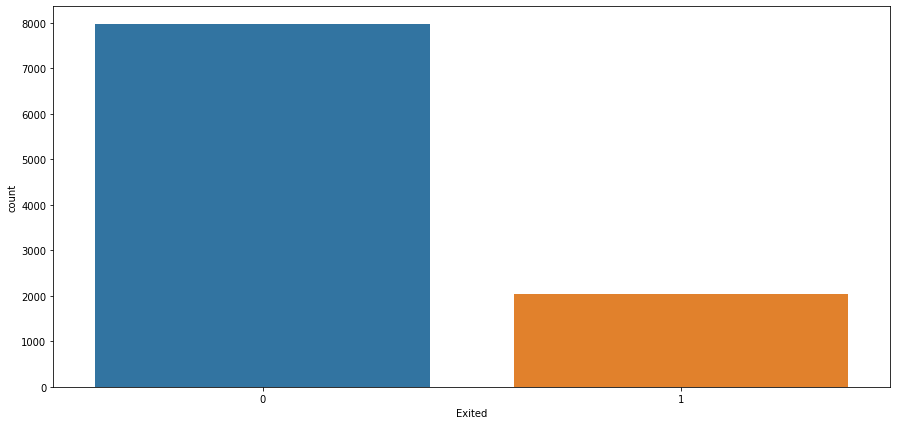

In [5]:
plt.figure(figsize=(15,7))
sbn.countplot(dataFrame['Exited']) ## yıllara göre araba sayıları

<AxesSubplot:>

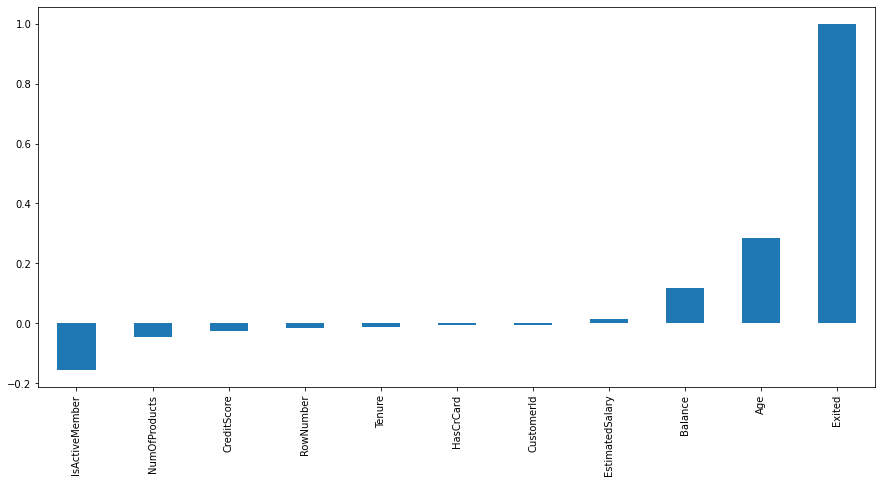

In [6]:
plt.figure(figsize=(15,7))
dataFrame.corr()['Exited'].sort_values().plot(kind='bar')

Veri setinin korelasyonu

In [7]:
dataFrame.corr() ## Verilerinin birbiri arasındaki etkisi

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [8]:
dataFrame.corr()['Exited'].sort_values() ## Type değişkeni üzerinde diğer verilerin etkisi

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

Encoding

In [9]:
y = dataFrame['Exited'].values ## Bağımlı
x = dataFrame.iloc[:,3:13].values

In [10]:
from sklearn import preprocessing

In [11]:
Geography = x[:,1]
labelEncoder = preprocessing.LabelEncoder()
Geography = labelEncoder.fit_transform(x[:,1])
Geography = Geography.reshape((10000,1))
Geography

array([[0],
       [2],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [12]:
oneHotEncoder = preprocessing.OneHotEncoder()
Geography = oneHotEncoder.fit_transform(Geography).toarray()
Geography

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [13]:
Gender = x[:,2]
labelEncoder1 = preprocessing.LabelEncoder()
Gender = labelEncoder1.fit_transform(x[:,2])
Gender = Gender.reshape((10000,1))
Gender

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [14]:
oneHotEncoder1 = preprocessing.OneHotEncoder()
Gender = oneHotEncoder1.fit_transform(Gender).toarray()
Gender = Gender[:,1]
Gender = Gender.reshape((10000,1))
Gender

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [78]:
x = np.delete(x,1,1)
x = np.delete(x,1,1)
x = np.concatenate((x,Geography),axis=1)
x = np.concatenate((x,Gender),axis=1)
x

array([[619, 0.0, 1, ..., 0.0, 0.0, 0.0],
       [608, 83807.86, 1, ..., 0.0, 1.0, 0.0],
       [502, 159660.8, 3, ..., 0.0, 0.0, 0.0],
       ...,
       [709, 0.0, 1, ..., 0.0, 0.0, 0.0],
       [772, 75075.31, 2, ..., 1.0, 0.0, 1.0],
       [792, 130142.79, 1, ..., 0.0, 0.0, 0.0]], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

In [ ]:
# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [116]:
x_train.shape ## Nöron sayısı genelde kolon sayı seçilir

(6700, 12)

In [117]:
model = Sequential()

model.add(Dense(12,activation='relu')) ## 12 norön ilk katman alttakiler ara katmanlar
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))

model.add(Dense(1,activation='sigmoid')) ## Çıkış katmanı

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [118]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),verbose=1,epochs=50) 
## x_train ile y_train arasında bir ilişki bulucak,
## epochs=700 700 kere işlem yapıcak

Epoch 1/50
210/210 [==============================] - 1s 2ms/step - loss: 0.7719 - accuracy: 0.4468 - val_loss: 0.5144 - val_accuracy: 0.7955
Epoch 2/50
210/210 [==============================] - 0s 1ms/step - loss: 0.4846 - accuracy: 0.8009 - val_loss: 0.4411 - val_accuracy: 0.8079
Epoch 3/50
210/210 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8103 - val_loss: 0.4173 - val_accuracy: 0.8315
Epoch 4/50
210/210 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8317 - val_loss: 0.4059 - val_accuracy: 0.8324
Epoch 5/50
210/210 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8313 - val_loss: 0.3955 - val_accuracy: 0.8379
Epoch 6/50
210/210 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8427 - val_loss: 0.3846 - val_accuracy: 0.8433
Epoch 7/50
210/210 [==============================] - 0s 1ms/step - loss: 0.3835 - accuracy: 0.8385 - val_loss: 0.3754 - val_accuracy: 0.8464
Epoch 

<AxesSubplot:>

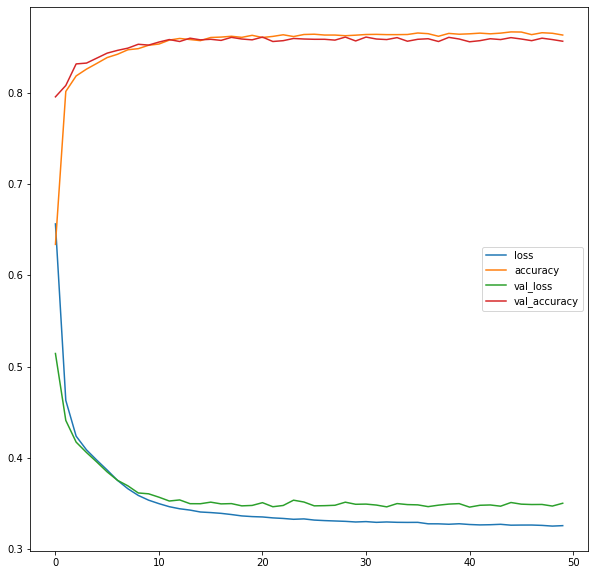

In [119]:
lossData = pd.DataFrame(model.history.history)
lossData.plot(figsize=(10,10))

In [125]:
guess = model.predict_classes(x_test)

In [126]:
from sklearn.metrics import classification_report, confusion_matrix

In [127]:
print(classification_report(y_test,guess))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2617
           1       0.73      0.48      0.58       683

    accuracy                           0.86      3300
   macro avg       0.80      0.72      0.75      3300
weighted avg       0.85      0.86      0.84      3300



In [129]:
print(confusion_matrix(y_test,guess))

[[2498  119]
 [ 355  328]]
